[Using machine learning for language detection](https://heartbeat.comet.ml/using-machine-learning-for-language-detection-517fa6e68f22)

In [19]:
import re
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [20]:
dataset_df = pd.read_csv("full_dataset.csv")
dataset_df.size

45594

In [21]:
dataset_df["Language"].value_counts()

Language
Afrikaans     400
Albanian      400
Latin         400
Latvian       400
Lithuanian    400
Malayalam     400
Marathi       400
Myanmar       400
Nepali        400
Norwegian     400
Oriya         400
Polish        400
Portugeese    400
Romanian      400
Russian       400
Serbian       400
Slovak        400
Somali        400
Spanish       400
Swedish       400
Tamil         400
Telugu        400
Thai          400
Turkish       400
Ukranian      400
Vietnamese    400
Xhosa         400
Korean        400
Japanese      400
Italian       400
English       400
Amharic       400
Arabic        400
Armenian      400
Basque        400
Bengali       400
Bulgarian     400
Chinese       400
Creole        400
Croatian      400
Czech         400
Danish        400
Dutch         400
Esperanto     400
Estonian      400
Farsi         400
Finnish       400
French        400
German        400
Gujarati      400
Hebrew        400
Hungarian     400
Icelandic     400
Indonesian    400
Zulu          400
K

In [22]:
language_series = dataset_df["Language"]
language_series.shape

(22797,)

In [23]:
from sklearn.preprocessing import LabelEncoder


label_encoder: LabelEncoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(language_series)
y_encoded

array([ 0,  0,  0, ..., 57, 57, 57])

In [24]:
text_series = dataset_df["Text"]
text_series

0        In die begin het God die hemel en die aarde ge...
1        En die aarde was woes en leeg, en duisternis w...
2        En God het gesê: Laat daar lig wees! En daar w...
3        Toe sien God dat die lig goed was. En God het ...
4        en God het die lig dag genoem, en die duistern...
                               ...                        
22792    Ngalokho umthombo wabizwa ngokuthi iBeri Lahay...
22793    UHagari wamzalela u-Abrama indodana; u-Abrama ...
22794    U-Abrama wayeneminyaka engamashumi ayisishiyag...
22795    U-Abrama eneminyaka engamashumi ayisishiyagalo...
22796    Ngiyakwenza isivumelwano sami phakathi kwami n...
Name: Text, Length: 22797, dtype: object

In [26]:
text_list: list[str] = []
for text in text_series.to_list():
    sub_text: str = text
    try:
        sub_text: str = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', " ", sub_text)
        sub_text: str = re.sub(r"[[]]", " ", sub_text)
        sub_text: str = sub_text.lower()
        text_list.append(sub_text)
    except Exception as error:
        print(text, "Error", error)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_encoded = cv.fit_transform(text_list).toarray()
x_encoded.shape

(22797, 80060)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y_encoded, test_size=0.20
)

In [29]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
y_prediction = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, y_prediction)
confusion_m = confusion_matrix(y_test, y_prediction)


print("The accuracy is :", accuracy)

The accuracy is : 0.9473684210526315


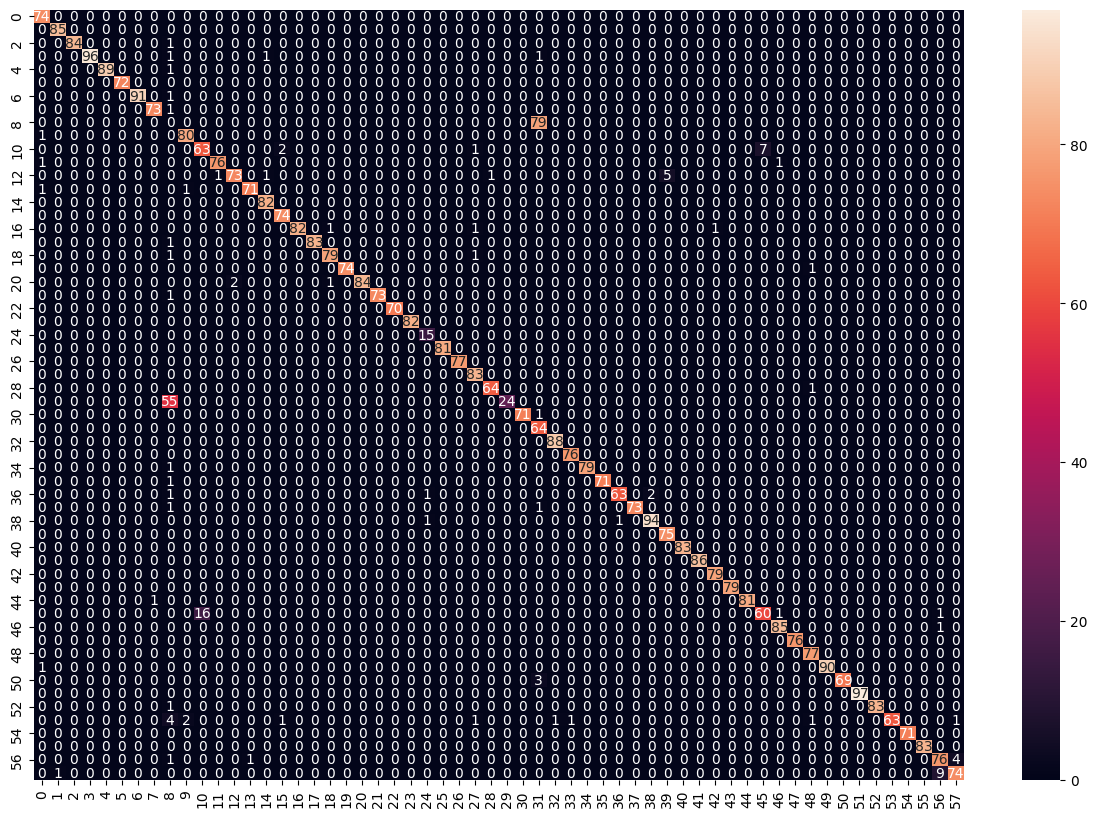

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_m, annot=True)
plt.show()

In [33]:
import pickle
import os


def create_file(filename: str, content):
    if os.path.exists(filename):
        os.remove(filename)
    f = open(filename, "wb")
    pickle.dump(content, f)


create_file("./models/model.pkl", model)
create_file("./models/vector.pkl", cv)
create_file("./models/label.pkl", label_encoder)

In [34]:
def lang_predict(text: str):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = label_encoder.inverse_transform(lang)
    print("The language is in", lang[0])

In [35]:
lang_predict("Good moring American")

The language is in English


In [36]:
lang_predict("안녕하세요")

The language is in Korean
